# Results notebook

In this notebook, I have tested out the different algorithms:
- how long they take to find the goal position
- memory usage
- how optimal is the path, this is shown by:
    - distance of the path
    - how many turns need to be taken
    - also modelling the acceleration of the mouse, we can account for the time it "would" take in real time to travel a path 

In [1]:
from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

In [2]:
maze = Utils.load_maze('mazes/competition_json/AAMC23Maze.json')

## Classical Algorithms

### Floodfill

In [3]:
flood = FloodFill(walls=maze)
flood_path = flood.get_path_from_flood_map()
print(flood.get_stats())

(37, 18, 0)


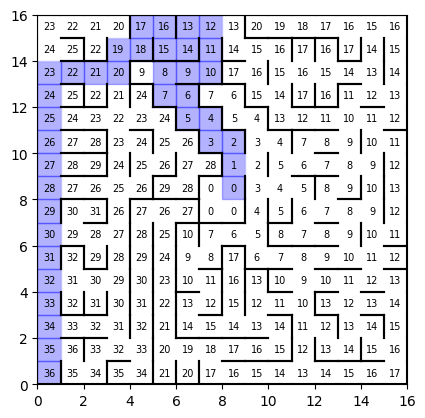

In [4]:
Utils().draw_maze(walls=maze, path=flood_path, dist_map= flood.flood_map)

In [5]:
stats = Stats()
print(stats.get_time_from_path(flood_path))

(1, 13) 4.43 0.2170803763674803 0.5999999999999999
(3, 14) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(4, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(4, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 13) 1.697056274847714 0.2170803763674803 0.5999999999999999
(5, 12) 1.697056274847714 0.2170803763674803 0.5999999999999999
(6, 12) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 10) 1.1999999999999997 0.217080376367

### BFS

In [6]:
bfs = BFS(walls=maze)
bfs_path = bfs.find_shortest_path_to_goal()
print(bfs.get_stats())

0
(37, 18, 0)


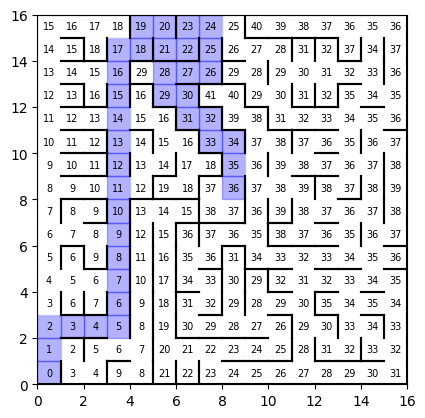

In [7]:
Utils().draw_maze(walls=maze, path=bfs_path, dist_map = bfs.distances)

In [8]:
stats = Stats()
print(stats.get_time_from_path(bfs_path))

(1, 2) 1.8973665961010278 0.2170803763674803 0.5999999999999999
(3, 3) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(4, 14) 4.159999999999999 0.2170803763674803 0.5999999999999999
(4, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 13) 1.697056274847714 0.2170803763674803 0.5999999999999999
(5, 12) 1.697056274847714 0.2170803763674803 0.5999999999999999
(6, 12) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 10) 1.1999999999999997 0.2

### Dijkstra

In [9]:
dijkstra = Dijkstra(walls=maze)
dijkstra_path = dijkstra.find_shortest_path_to_goal()
print(dijkstra.get_stats())

(37, 18, 0)


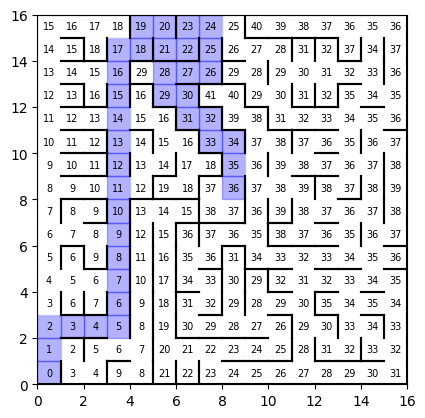

In [10]:
Utils().draw_maze(walls=maze, path=dijkstra_path, dist_map = dijkstra.distances)

In [11]:
print(stats.get_time_from_path(dijkstra_path))

(1, 2) 1.8973665961010278 0.2170803763674803 0.5999999999999999
(3, 3) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(4, 14) 4.159999999999999 0.2170803763674803 0.5999999999999999
(4, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 13) 1.697056274847714 0.2170803763674803 0.5999999999999999
(5, 12) 1.697056274847714 0.2170803763674803 0.5999999999999999
(6, 12) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 10) 1.1999999999999997 0.2

### A*

In [12]:
astar = AStar(walls=maze)
astar_path = astar.find_shortest_path_to_goal()
print(astar.get_stats())

Filename: D:\Diss\Simulator\final\algorithms\classical\astar\AStar.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    51    122.4 MiB    122.4 MiB           1       @profile
    52                                             def find_shortest_path_to_goal(self):
    53    122.4 MiB      0.0 MiB           1           self.a_star()
    54    122.4 MiB      0.0 MiB           9           goal_position = min(self.goal_positions, key=lambda pos: self.distances[pos[0]][pos[1]])
    55    122.4 MiB      0.0 MiB           1           self.curr_position = goal_position
    56    122.4 MiB      0.0 MiB           1           self.path.append(self.curr_position)
    57                                         
    58    122.4 MiB      0.0 MiB          37           while self.curr_position != self.start_position:
    59    122.4 MiB      0.0 MiB          36               x, y = self.curr_position
    60    122.4 MiB      0.0 MiB         252               neighbors = [(x + dx, y + d

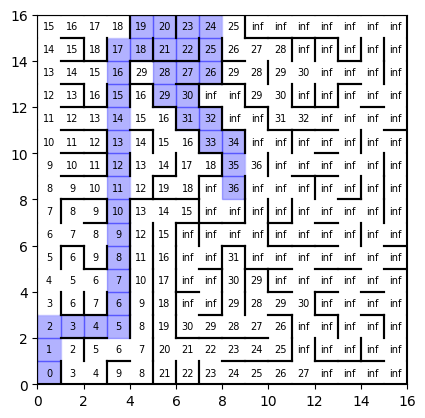

In [13]:
Utils().draw_maze(walls=maze, path=astar_path, dist_map = astar.distances)

In [14]:
stats = Stats()
print(stats.get_time_from_path(astar_path))

(1, 2) 1.8973665961010278 0.2170803763674803 0.5999999999999999
(3, 3) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(4, 14) 4.159999999999999 0.2170803763674803 0.5999999999999999
(4, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 13) 1.697056274847714 0.2170803763674803 0.5999999999999999
(5, 12) 1.697056274847714 0.2170803763674803 0.5999999999999999
(6, 12) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 10) 1.1999999999999997 0.2

## Reinforcememnt Learning

### Sarsa

In [15]:
sarsa = Sarsa(walls=maze)

Running episode: 0
Prev: 0, Current reward: -309192.0
stats: (801, 510, 0)
Running episode: 1
Prev: -309192.0, Current reward: -109047.0
stats: (201, 116, 0)
Running episode: 2
Prev: -109047.0, Current reward: -79170.25
stats: (691, 362, 0)
Running episode: 3
Prev: -79170.25, Current reward: 924.25
stats: (305, 156, 0)
Running episode: 4
Prev: 924.25, Current reward: 965.25
stats: (141, 78, 0)
Running episode: 5
Prev: 965.25, Current reward: -9079.5
stats: (321, 144, 0)
Running episode: 6
Prev: -9079.5, Current reward: -9104.5
stats: (421, 192, 0)
Running episode: 7
Prev: -9104.5, Current reward: 904.25
stats: (385, 174, 0)
Running episode: 8
Prev: 904.25, Current reward: 967.25
stats: (133, 56, 0)
Running episode: 9
Prev: 967.25, Current reward: 891.75
stats: (435, 190, 0)
Running episode: 10
Prev: 891.75, Current reward: 942.75
stats: (231, 122, 0)
Running episode: 11
Prev: 942.75, Current reward: -9114.0
stats: (459, 206, 0)
Running episode: 12
Prev: -9114.0, Current reward: 979.75


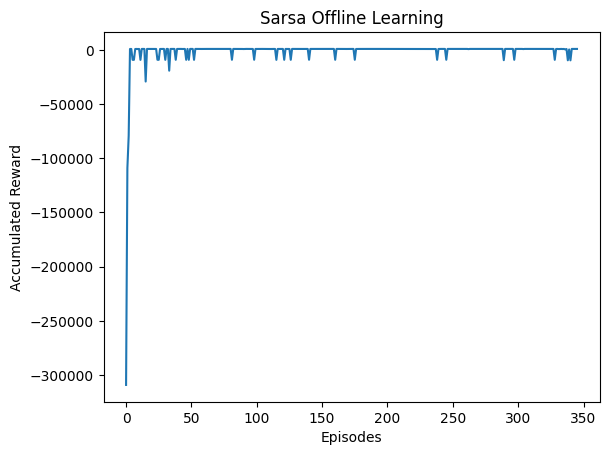

In [16]:
sarsa.run_sarsa()
sarsa_path = sarsa.get_path()

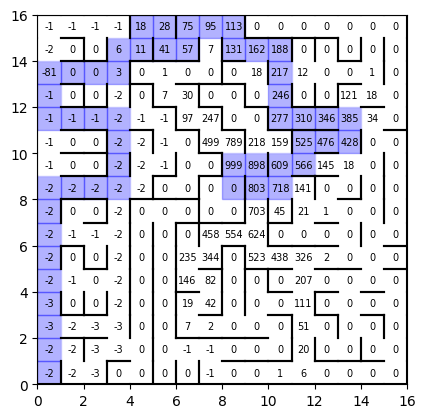

In [17]:
Utils.draw_maze(walls=maze, dist_map=sarsa.get_max_q_values(), path=sarsa_path)

In [18]:
stats = Stats()
stats.get_time_from_path(sarsa_path)

(1, 8) 3.49857113690718 0.2170803763674803 0.5999999999999999
(3, 9) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(2, 11) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(0, 12) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(1, 13) 1.697056274847714 0.2170803763674803 0.5999999999999999
(3, 14) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(4, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(4, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(8, 14) 1.697056274847714 0.2170803763674803 0.5999999999999999
(9, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(10, 13) 1.697056274847714 0.21

62.00165183634846

### QLearning


Running episode: 0
Prev: 0, Current reward: -419233.75
stats: (979, 602, 0)
Running episode: 1
Prev: -419233.75, Current reward: -79107.75
stats: (441, 252, 0)
Running episode: 2
Prev: -79107.75, Current reward: -129140.0
stats: (575, 314, 0)
Running episode: 3
Prev: -129140.0, Current reward: -69068.5
stats: (283, 152, 0)
Running episode: 4
Prev: -69068.5, Current reward: -89103.0
stats: (423, 224, 0)
Running episode: 5
Prev: -89103.0, Current reward: -49076.0
stats: (311, 168, 0)
Running episode: 6
Prev: -49076.0, Current reward: -119136.25
stats: (559, 290, 0)
Running episode: 7
Prev: -119136.25, Current reward: -19060.25
stats: (245, 126, 0)
Running episode: 8
Prev: -19060.25, Current reward: -119083.75
stats: (349, 200, 0)
Running episode: 9
Prev: -119083.75, Current reward: -119147.25
stats: (603, 324, 0)
Running episode: 10
Prev: -119147.25, Current reward: 968.75
stats: (127, 62, 0)
Running episode: 11
Prev: 968.75, Current reward: -59088.25
stats: (361, 186, 0)
Running episode

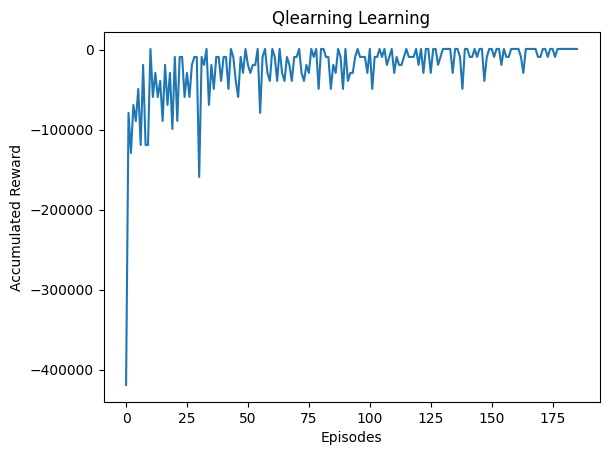

In [19]:
qlearning = QLearning(walls=maze)
qlearning.run_qlearning()
qlearning_path = qlearning.get_path()

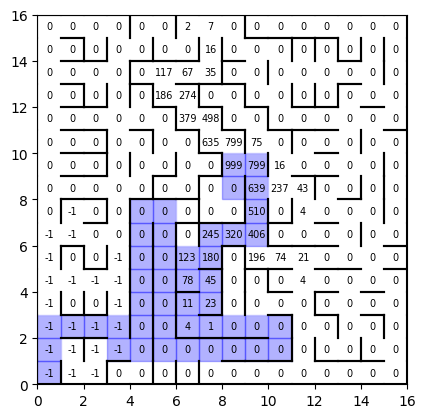

In [20]:
Utils.draw_maze(walls=maze, dist_map=qlearning.get_max_q_values(), path=qlearning_path)


In [21]:
stats = Stats()
stats.get_time_from_path(qlearning_path)

(1, 2) 1.8973665961010278 0.2170803763674803 0.5999999999999999
(3, 1) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(4, 1) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(4, 2) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 7) 2.939387691339814 0.2170803763674803 0.5999999999999999
(5, 6) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 1) 2.939387691339814 0.2170803763674803 0.5999999999999999
(10, 2) 2.6832815729997472 0.2170803763674803 0.5999999999999999
(9, 2) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 3) 2.4 0.2170803763674803 0.5999999999999999
(7, 3) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 4) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 4) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 5) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 5) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 6) 1.1999999999999997 0.2170803763674803 0.599999999

49.45500929214304

### DynaQ QLearning

Running episode: 0
Prev: 0, Current reward: -409904.8587358706
stats: (1113, 646, 904.8587358695497)
Running episode: 1
Prev: -409904.8587358706, Current reward: -19063.610836842567
stats: (107, 40, 63.61083684254982)
Running episode: 2
Prev: -19063.610836842567, Current reward: 894.3246638102455
stats: (187, 58, 105.67533618975455)
Running episode: 3
Prev: 894.3246638102455, Current reward: -19045.484975791333
stats: (71, 30, 45.48497579132836)
Running episode: 4
Prev: -19045.484975791333, Current reward: -9058.297668986834
stats: (103, 34, 58.297668986835625)
Running episode: 5
Prev: -9058.297668986834, Current reward: 954.6442454550576
stats: (79, 26, 45.35575454494245)
Running episode: 6
Prev: 954.6442454550576, Current reward: 956.0563986693822
stats: (71, 26, 43.9436013306177)
Running episode: 7
Prev: 956.0563986693822, Current reward: 954.6442454550576
stats: (79, 26, 45.35575454494245)
Running episode: 8
Prev: 954.6442454550576, Current reward: 946.9275271210994
stats: (93, 30,

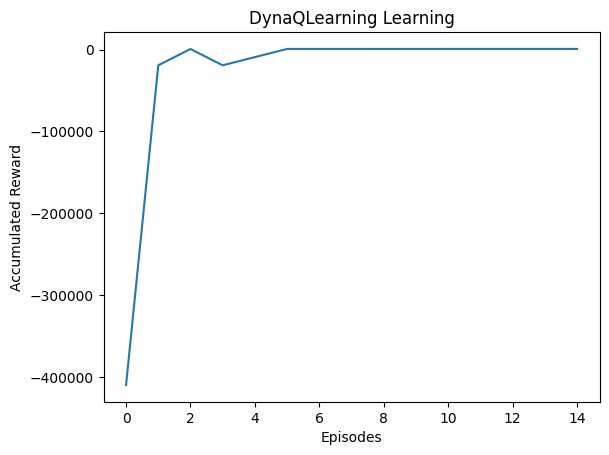

In [22]:
dyna_qlearning = DynaQLearning(walls=maze)
dyna_qlearning.run_dyna_qlearning()
dyna_qlearning_path = dyna_qlearning.get_path()

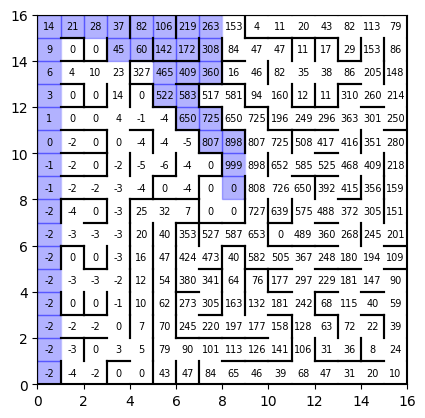

In [23]:
Utils.draw_maze(walls=maze, dist_map=dyna_qlearning.get_max_q_values(), path=dyna_qlearning_path)

In [24]:
stats = Stats()
stats.get_time_from_path(dyna_qlearning_path)

(1, 15) 4.789999999999999 0.2170803763674803 0.5999999999999999
(3, 14) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(4, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(4, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 13) 1.697056274847714 0.2170803763674803 0.5999999999999999
(5, 12) 1.697056274847714 0.2170803763674803 0.5999999999999999
(6, 12) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 10) 1.1999999999999997 0

41.77002029339273

### DynaQ Sarsa


Running episode: 0
Prev: 0, Current reward: -379875.8585223344
stats: (1029, 632, 875.8585223350383)
Running episode: 1
Prev: -379875.8585223344, Current reward: -40493.137317300854
stats: (3091, 738, 1493.1373173032755)
Running episode: 2
Prev: -40493.137317300854, Current reward: 903.9719505274031
stats: (211, 46, 96.0280494725969)
Running episode: 3
Prev: 903.9719505274031, Current reward: 921.3534762377584
stats: (175, 38, 78.64652376224164)
Running episode: 4
Prev: 921.3534762377584, Current reward: 759.8502850316424
stats: (527, 114, 240.14971496835759)
Running episode: 5
Prev: 759.8502850316424, Current reward: 971.2952227891968
stats: (37, 18, 28.704777210803147)
Running episode: 6
Prev: 971.2952227891968, Current reward: 971.2519783467569
stats: (37, 18, 28.748021653243068)
Running episode: 7
Prev: 971.2519783467569, Current reward: 962.865307048129
stats: (55, 22, 37.13469295187102)
Running episode: 8
Prev: 962.865307048129, Current reward: 962.8219555917675
stats: (55, 22, 3

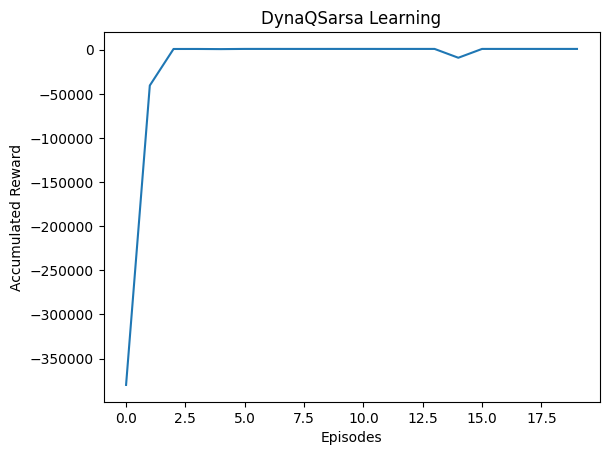

In [25]:
dynaq_sarsa = DynaQSarsa(walls=maze)
dynaq_sarsa.run_dyna_sarsa()
dynaq_sarsa_path = dynaq_sarsa.get_path()

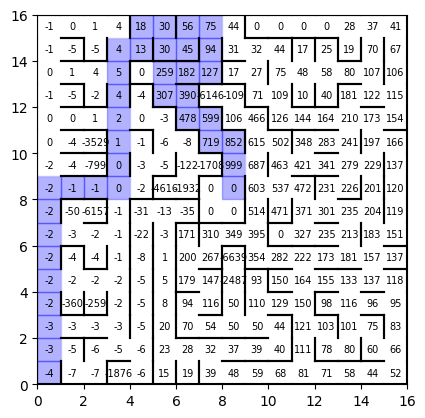

In [26]:
Utils.draw_maze(walls=maze, dist_map=dynaq_sarsa.get_max_q_values(), path=dynaq_sarsa_path)

In [27]:
stats = Stats()
stats.get_time_from_path(dynaq_sarsa_path)

(1, 8) 3.49857113690718 0.2170803763674803 0.5999999999999999
(3, 9) 2.0784609690826525 0.2170803763674803 0.5999999999999999
(4, 14) 2.939387691339814 0.2170803763674803 0.5999999999999999
(4, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(5, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 15) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 14) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 13) 1.697056274847714 0.2170803763674803 0.5999999999999999
(5, 12) 1.697056274847714 0.2170803763674803 0.5999999999999999
(6, 12) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(6, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 11) 1.1999999999999997 0.2170803763674803 0.5999999999999999
(7, 10) 1.1999999999999997 0.217

42.21797912163973

In [28]:
dynaq_sarsa_path

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (1, 8),
 (2, 8),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (4, 14),
 (4, 15),
 (5, 15),
 (5, 14),
 (6, 14),
 (6, 15),
 (7, 15),
 (7, 14),
 (7, 13),
 (6, 13),
 (5, 13),
 (5, 12),
 (6, 12),
 (6, 11),
 (7, 11),
 (7, 10),
 (8, 10),
 (8, 9),
 (8, 8)]